In [29]:
import numpy as np
import pylab as plt
import scipy
from astroML.datasets import fetch_dr7_quasar
from tqdm.notebook import tqdm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [3]:
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to /Users/alessandrosantini/astroML_data
[=========================================]  12.82Mb / 12.82Mb   


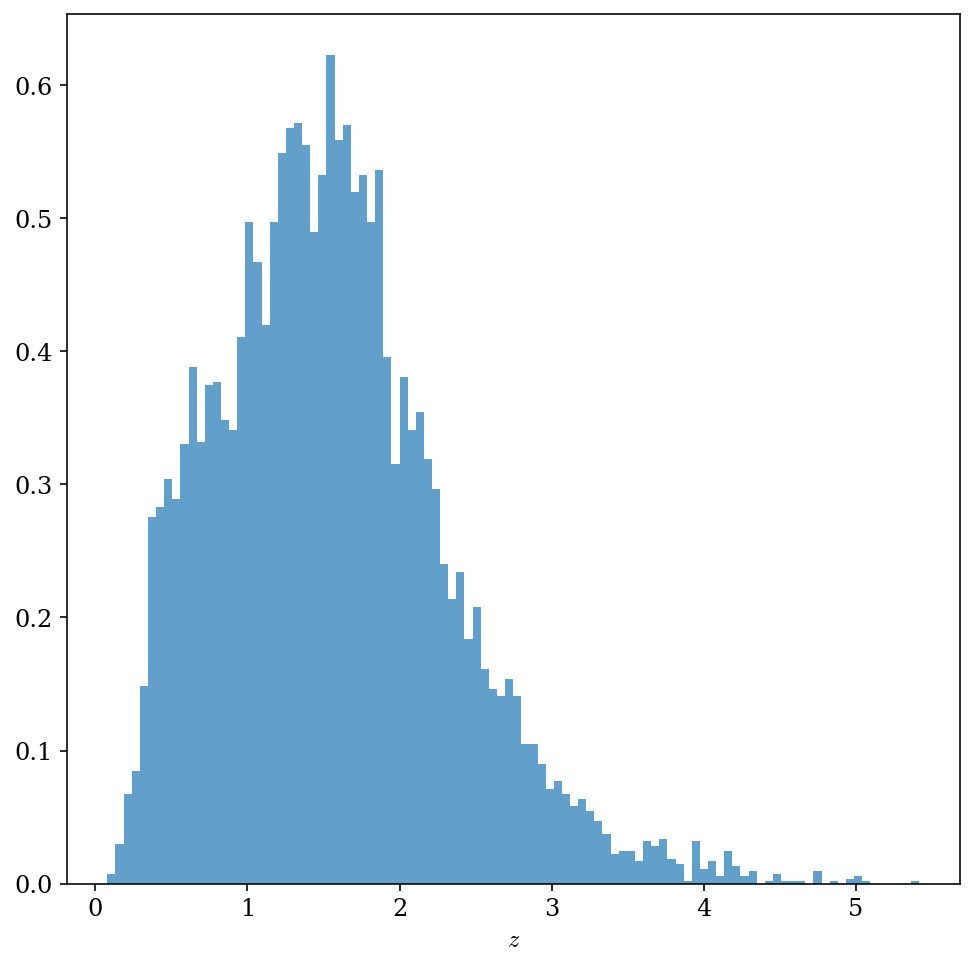

In [18]:
plt.hist(z, bins = 100, density = True, alpha = 0.7)
plt.xlabel("$z$")
plt.show()

# Rejection sampling

In [52]:
n, edges = np.histogram(z, bins = 100, density =True)
hist_z = scipy.stats.rv_histogram((n, edges))

N_samples = int(1e4) #number of samples

In [56]:
#scipy method
cloned_data_scipy = hist_z.rvs(size = N_samples)

In [57]:
#explicit method
z_samples = np.random.uniform(0, edges.max(), N_samples)
n_samples = np.random.uniform(0, n.max(), N_samples)

mask = n_samples <= hist_z.pdf(z_samples)
cloned_data = z_samples[mask]

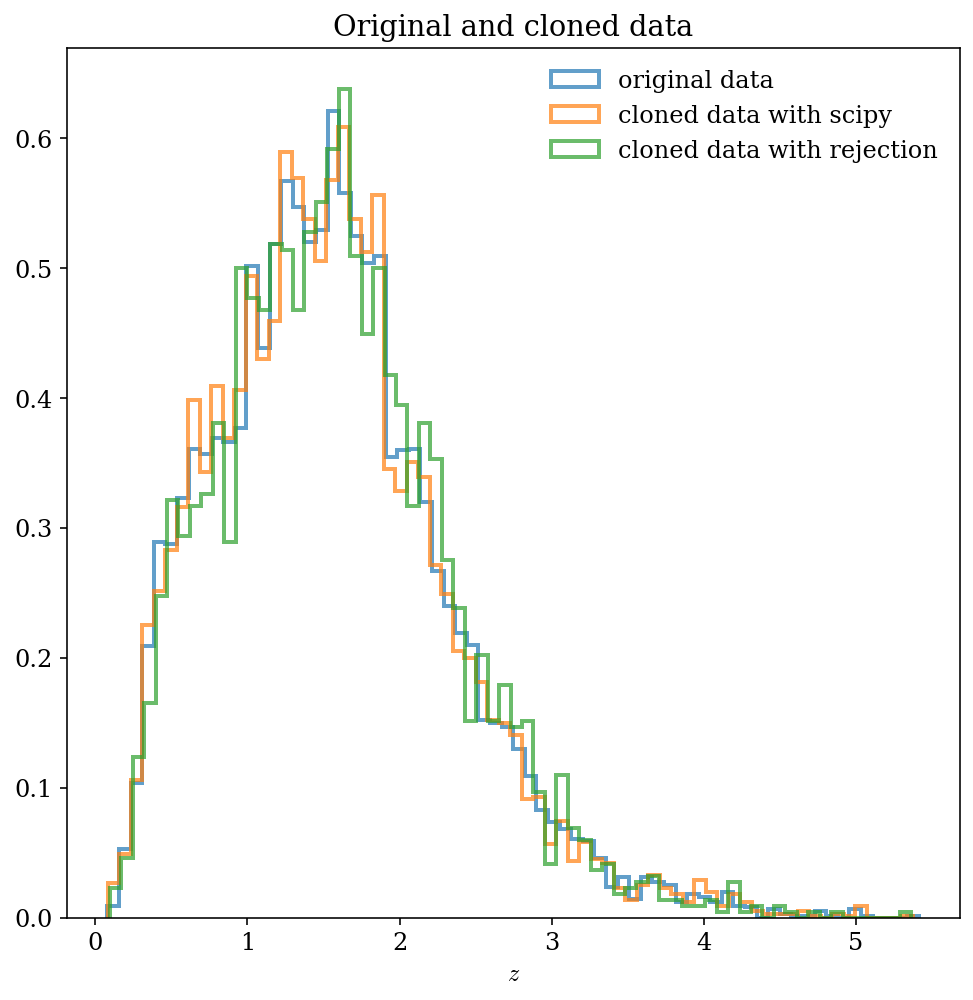

In [63]:
plt.hist(z, bins = 70, density = True, histtype = 'step', lw = 2, alpha = 0.7, label = 'original data')
plt.hist(cloned_data_scipy, bins = 70, density = True, histtype = 'step', lw = 2, alpha = 0.7, label = 'cloned data with scipy')
plt.hist(cloned_data, bins = 70, density = True, histtype = 'step', lw = 2, alpha = 0.7, label = 'cloned data with rejection')
plt.xlabel("$z$")
plt.title('Original and cloned data')
plt.legend(frameon = False)
plt.show()